# Files Per User CDF

This notebook takes a sample of GPFS data and makes a Cumulitive Distribution of Files per user

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

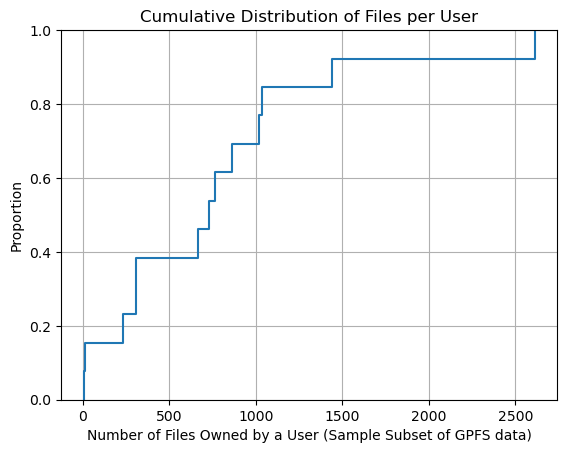

In [4]:
# streaming data through Lazy Loading Method on a sample subset of the data
file_path = "/mnt/research/CMSE495-SS24-ICER/file_system_usage/gpfs-stats/inode-size-age-jan-23"

# Explicit column names, since the data has no header
column_names = [
    "Inode (file unique ID)",
    "KB Allocated",
    "File Size",
    "Creation Time in days from today",
    "Change Time in days from today",
    "Modification time in days from today",
    "Access time in days from today",
    "GID numeric ID for the group owner of the file",
    "UID numeric ID for the owner of the file"
]

# Initialize a dictionary to count files per UID
file_counts_per_user = {}

# Initialize a counter for rows
row_counter = 0

# Maximum number of rows to process
max_rows = 10000

# Stream through the file line by line
with open(file_path, 'r') as file:
    for line in file:
        if row_counter >= max_rows:
            break  # Stop after processing max_rows
        values = line.strip().split(' ')
        
        # Associate values with column names
        row_data = dict(zip(column_names, values))
        
        uid = row_data["UID numeric ID for the owner of the file"]
        file_counts_per_user[uid] = file_counts_per_user.get(uid, 0) + 1
        
        # Increment the row counter
        row_counter += 1

# Plot the CDF
sns.ecdfplot(list(file_counts_per_user.values()))

plt.xlabel('Number of Files Owned by a User (Sample Subset of GPFS data)')
plt.title('Cumulative Distribution of Files per User')

plt.grid(True)
# plt.savefig("Files_per_User_CDF.png")  # Save the plot as a PNG file

In [20]:
file_counts
file_counts_per_user

{'762231': 20534,
 '614955': 7963,
 '1000000092': 8658,
 '831677': 8473,
 '753559': 7399,
 '881083': 14576,
 '500120': 9029,
 '638741': 3509,
 '785573': 10379,
 '841154': 3532,
 '697349': 963,
 '862983': 83,
 '839641': 4902}

In [25]:
# one row of the data
row_data

{'Inode (file unique ID)': '100785612',
 'KB Allocated': '64',
 'File Size': '33928',
 'Creation Time in days from today': '1447',
 'Change Time in days from today': '1447',
 'Modification time in days from today': '2758',
 'Access time in days from today': '1447',
 'GID numeric ID for the group owner of the file': '2392',
 'UID numeric ID for the owner of the file': '831677'}

In [26]:
# User ID's 
file_counts_per_user.keys()

dict_keys(['762231', '614955', '1000000092', '831677', '753559', '881083', '500120', '638741', '785573', '841154', '697349', '862983', '839641'])

In [30]:
# User # of files
file_counts_per_user.values()

dict_values([770282, 677944, 401240, 366720, 370087, 854293, 647583, 811053, 641083, 524821, 273736, 128272, 532431, 15, 15, 15, 15, 15, 15, 15, 15, 1, 322, 12])

## Sample plot LOG 10 scaled

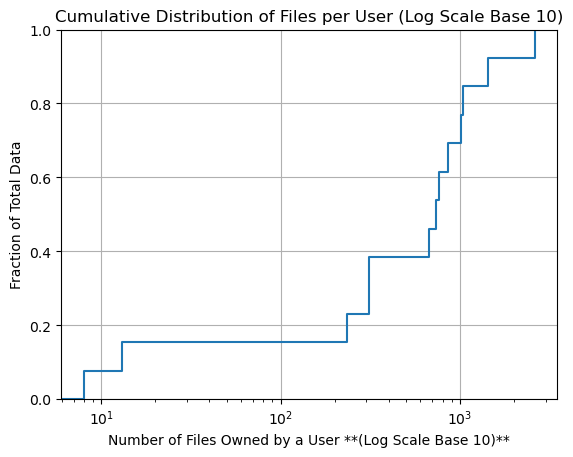

In [5]:
# Same plot but log scaled x-axis
data = list(file_counts_per_user.values())

# Create an ECDF plot
sns.ecdfplot(data)

# Set the x-axis to a log scale with base 10
plt.xscale('log', base=10)
# Set labels and title
plt.xlabel('Number of Files Owned by a User **(Log Scale Base 10)**')
plt.ylabel('Fraction of Total Data')
plt.title('Cumulative Distribution of Files per User (Log Scale Base 10)')

# Enable grid
plt.grid()  # Show grid for both major and minor ticks

# Display the plot
plt.show()